## Random Forest

#### Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from PIL import Image
import os
from tqdm import tqdm
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.utils import shuffle

### Load Data function

In [2]:
def load_images_from_folder(folder, image_size = (64, 64)):
    images = []
    labels = []
    cities = os.listdir(folder)
    for city in cities:
        for filename in os.listdir(os.path.join(folder, city)):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                img = Image.open(os.path.join(folder, city, filename))
                img = img.resize(image_size)  # Resize images
                img_array = np.array(img).flatten()  # Flatten the image
                images.append(img_array)
                labels.append(city)
    
    shuffle(images, labels)
    return np.array(images), np.array(labels)

### Split train/validation data

In [3]:
images, labels = load_images_from_folder("./data/train", (64, 64))
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
all_labels = np.unique(labels)
all_labels = np.sort(all_labels)

### random forest object and test function

In [ ]:
class MyRandomForestClassifier(RandomForestClassifier):
    
    '''
    n_estimators: int, default=300
        The number of trees in the forest.
    max_depth: int, default=None
        The maximum depth of the tree.
    max_leaf_nodes: int, default=None
        Grow trees with max_leaf_nodes.
    max_features: int, default="log2"
        The number of features to consider when looking for the best split.
    normalize: bool, default=False
        Normalize the data.
    use_PCA: bool, default=False
        Use PCA to reduce the dimensionality of the data.
    PCA_component: int, default=100
        The number of components to keep.
    '''
    def __init__(self, n_estimators=300, max_depth=None, max_leaf_nodes=None, max_features="log2",normalize = False, use_PCA=False, PCA_component=100):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_leaf_nodes = max_leaf_nodes
        self.max_features = max_features
        self.use_PCA = use_PCA
        self.PCA_component = PCA_component
        self.normalize = normalize
        self.clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, max_features=max_features, random_state=1323)
    
    '''
    fit: Fit the model according to the given training data.
    '''
    def fit(self, X_train, y_train):
        # Normalize the data
        if self.normalize:
            print("Normalizing the data")
            self.scaler = StandardScaler()
            self.scaler.fit(X_train)
            X_train = self.scaler.transform(X_train)
        if self.use_PCA:
            print("Using PCA")
            self.pca = PCA(n_components=self.PCA_component, svd_solver='full')
            self.pca.fit(X_train)
            X_train = self.pca.transform(X_train)
        print("Fitting the model")
        self.clf.fit(X_train, y_train)
    
    
    '''
    predict: Predict class for X.
    '''
    def predict(self, X_test):
        # Normalize the data
        if self.normalize:
            X_test = self.scaler.transform(X_test)
        if(self.use_PCA == True):
            X_test = self.pca.transform(X_test)
        return self.clf.predict(X_test)
    
    def score(self, X_test, y_test):
        # Normalize the data
        if self.normalize:
            X_test = self.scaler.transform(X_test)
        if(self.use_PCA == True):
            pca = PCA(n_components=self.PCA_component, svd_solver='full')
            pca.fit(X_test)
            X_test = pca.transform(X_test)
        return self.clf.score(X_test, y_test)


'''
function for run a random forest model testing
return: accuracy, precision, recall, f1_score
'''
def run_random_forest(X_train, X_test, y_train, y_test, n_estimators=300, max_depth=None, max_leaf_nodes=None, max_features="log2", use_PCA=False, PCA_component=100):
    # Normalize the data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, max_features=max_features, random_state=1323)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return (accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred, average='macro'), metrics.recall_score(y_test, y_pred, average='macro'), metrics.f1_score(y_test, y_pred, average='macro'))


#### Confusion matrix rearrange function

In [5]:
def rearange_confusion_matrix(y_test, y_pred, origin_labels):
    rearrange_cities = ["Keelung_City", "Taipei_City", "New_Taipei_City", "Taoyuan_City", "Hsinchu_City", "Hsinchu_County", "Miaoli_County", "Taichung_City", "Changhua_County", "Nantou_County", "Yunlin_County", "Chiayi_City", "Chiayi_County", "Tainan_City", "Kaohsiung_City", "Pingtung_County", "Taitung_County", "Hualien_County", "Yilan_County"]
    rearrange_labels = {"Keelung_City": 0, "Taipei_City": 1, "New_Taipei_City": 2, "Taoyuan_City": 3, "Hsinchu_City": 4, "Hsinchu_County": 5, "Miaoli_County": 6, "Taichung_City": 7, "Changhua_County": 8, "Nantou_County": 9, "Yunlin_County": 10, "Chiayi_City": 11, "Chiayi_County": 12, "Tainan_City": 13, "Kaohsiung_City": 14, "Pingtung_County": 15, "Taitung_County": 16,"Hualien_County": 17, "Yilan_County": 18}
    # Rearange the confusion matrix
    
    
    new_y_test = [rearrange_labels[i] for i in y_test]
    new_y_pred = [rearrange_labels[i] for i in y_pred]
    return metrics.confusion_matrix(new_y_test, new_y_pred), rearrange_cities
        

### Simple Try

Normalizing the data
Fitting the model
Base case
Accuracy: 0.1105
Precision: 0.1127
Recall: 0.1105
F1: 0.1034


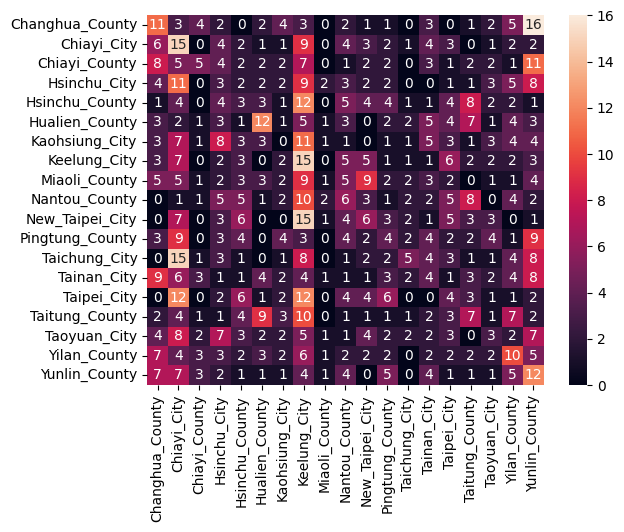

<Axes: >

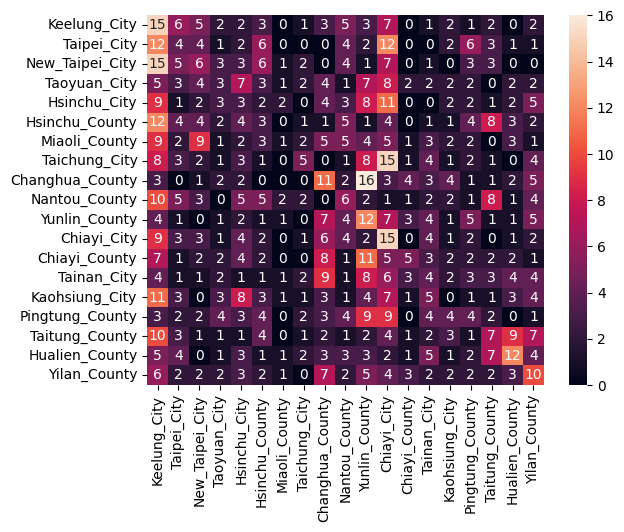

In [28]:
# Base case
# [n_estimators=300, max_depth=None, max_leaf_nodes=None, max_features="log2", normalize = True, use_PCA=False]
clf = MyRandomForestClassifier(normalize=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')
f1 = metrics.f1_score(y_test, y_pred, average='macro')

print("Base case")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=all_labels, yticklabels=all_labels)
plt.show()
re_cm, rearrange_cities = rearange_confusion_matrix(y_test, y_pred, all_labels)
sns.heatmap(re_cm, annot=True, xticklabels=rearrange_cities, yticklabels=rearrange_cities)



#### PCA Dimensionality Reduction Testing

In [ ]:
PCA_com = [100, 200, 300, 400, 500]
for i in PCA_com:
    print(f"PCA: {i}")
    clf = MyRandomForestClassifier(normalize=True, use_PCA=True, PCA_component=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average='macro')
    
    plt.plot(i, accuracy, 'r-o')
    plt.plot(i, f1, 'b-o')
    
plt.xlabel("PCA component")
plt.ylabel("Accuracy/F1")
plt.legend(["Accuracy", "F1"])
plt.show()    
    
    

## Test Different Hyperparameter

In [14]:

# Base case
# [n_estimators=300, max_depth=None, max_leaf_nodes=None, max_features="log2", use_PCA=False]
n_estimators = [10, 50, 100, 200, 500]
max_depth = [2, 3, 5, 10, 20]
max_leaf_nodes = [10, 25, 50, 75, 100]
max_features = ["sqrt", "log2"]


#### n_estimators

100%|██████████| 5/5 [00:38<00:00,  7.76s/it]


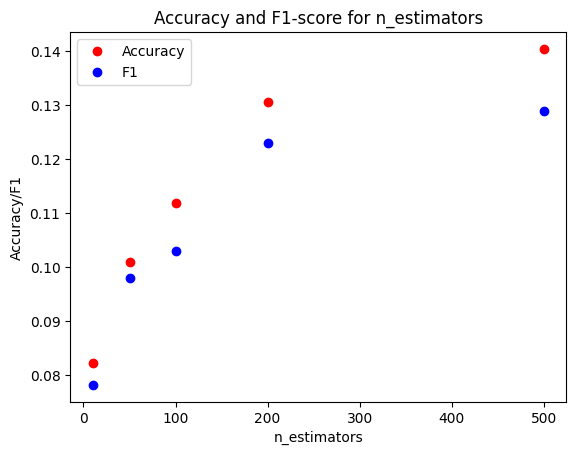

In [15]:
for n in tqdm(n_estimators):
    acc, precision, recall, f1 = run_random_forest(X_train, X_test, y_train, y_test, n_estimators=n)
    plt.plot(n, acc, 'ro')
    plt.plot(n, f1, 'bo')
    
plt.xlabel('n_estimators')
plt.ylabel('Accuracy/F1')
plt.legend(["Accuracy", "F1"])
plt.title('Accuracy and F1-score for n_estimators')
plt.show()

#### max_depth

  0%|          | 0/5 [00:00<?, ?it/s]/home/scottchou/NYCU/AI_Capstone/project1/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 20%|██        | 1/5 [00:01<00:04,  1.10s/it]/home/scottchou/NYCU/AI_Capstone/project1/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 40%|████      | 2/5 [00:02<00:03,  1.22s/it]/home/scottchou/NYCU/AI_Capstone/project1/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-define

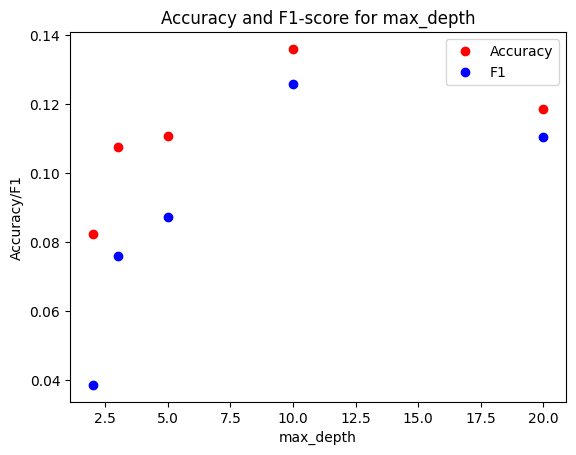

In [16]:
for n in tqdm(max_depth):
    acc, precision, recall, f1 = run_random_forest(X_train, X_test, y_train, y_test, max_depth=n)
    plt.plot(n, acc, 'ro')
    plt.plot(n, f1, 'bo')
    
plt.xlabel('max_depth')
plt.ylabel('Accuracy/F1')
plt.legend(["Accuracy", "F1"])
plt.title('Accuracy and F1-score for max_depth')
plt.show()

#### max_leaf_nodes

  0%|          | 0/5 [00:00<?, ?it/s]/home/scottchou/NYCU/AI_Capstone/project1/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 20%|██        | 1/5 [00:01<00:07,  1.88s/it]/home/scottchou/NYCU/AI_Capstone/project1/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 60%|██████    | 3/5 [00:06<00:04,  2.20s/it]/home/scottchou/NYCU/AI_Capstone/project1/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-define

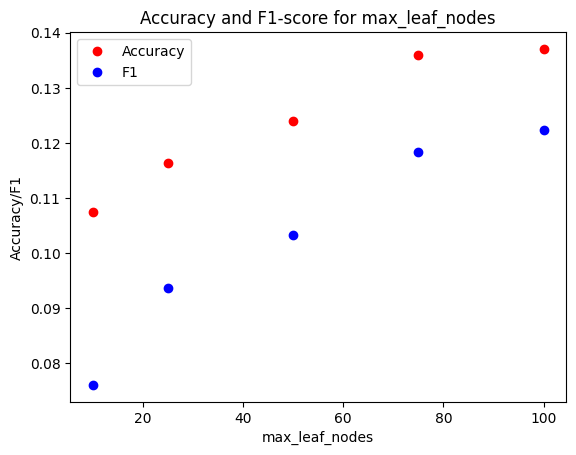

In [17]:
for n in tqdm(max_leaf_nodes):
    acc, precision, recall, f1 = run_random_forest(X_train, X_test, y_train, y_test, max_leaf_nodes=n)
    plt.plot(n, acc, 'ro')
    plt.plot(n, f1, 'bo')
    
plt.xlabel('max_leaf_nodes')
plt.ylabel('Accuracy/F1')
plt.legend(["Accuracy", "F1"])
plt.title('Accuracy and F1-score for max_leaf_nodes')
plt.show()

#### max_features

100%|██████████| 2/2 [00:38<00:00, 19.16s/it]


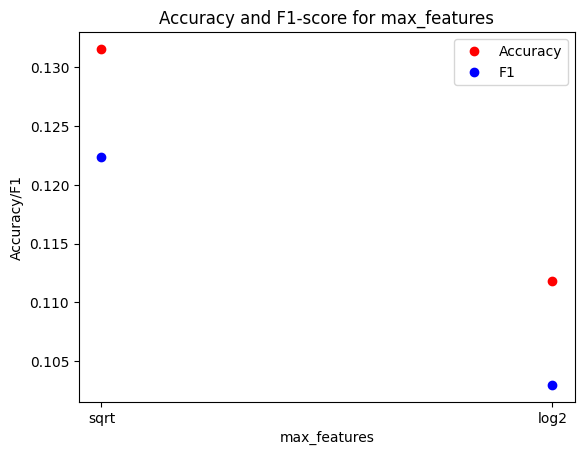

In [18]:
for n in tqdm(max_features):
    acc, precision, recall, f1 = run_random_forest(X_train, X_test, y_train, y_test, max_features=n)
    plt.plot(n, acc, 'ro')
    plt.plot(n, f1, 'bo')
    
plt.xlabel('max_features')
plt.ylabel('Accuracy/F1')
plt.legend(["Accuracy", "F1"])
plt.title('Accuracy and F1-score for max_features')
plt.show()

### final Try on Test data

Normalizing the data
Fitting the model
Accuracy: 11.84%


<Axes: >

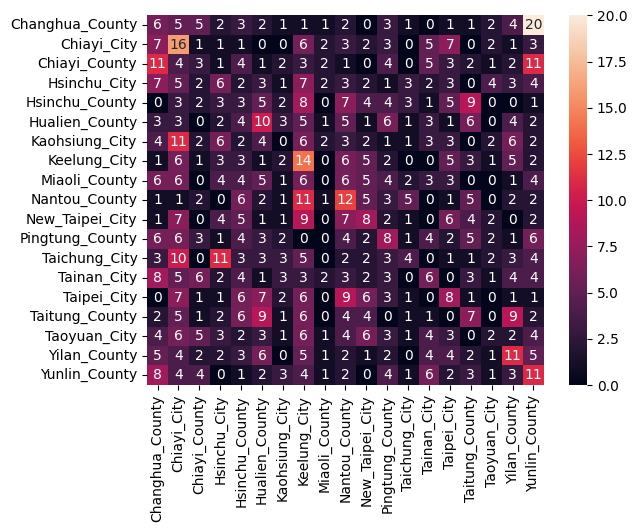

In [6]:


shuffle(images, labels)

clf = MyRandomForestClassifier(n_estimators=300, max_features="sqrt", normalize = True, use_PCA=False)
X_test, y_test = load_images_from_folder("./data/test")
clf.fit(images, labels)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

images, labels = load_images_from_folder("./data/test")
y_pred = clf.predict(images)
cm = confusion_matrix(labels, y_pred)

sns.heatmap(cm, annot=True, xticklabels=all_labels, yticklabels=all_labels)


<Axes: >

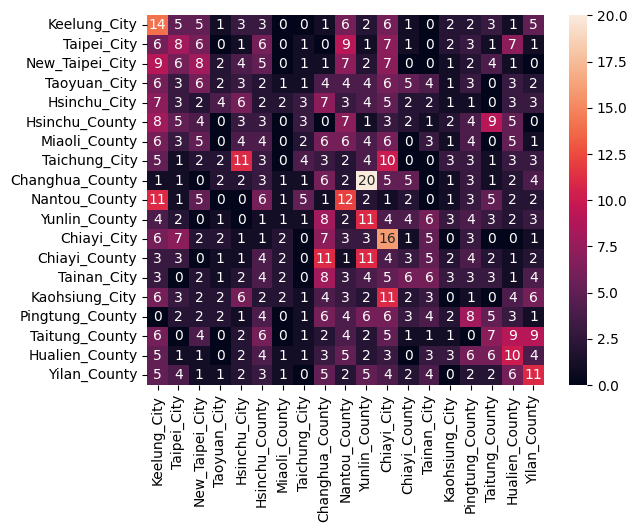

In [7]:

re_cm, rearrange_cities = rearange_confusion_matrix(y_test, y_pred, all_labels)
sns.heatmap(re_cm, annot=True, xticklabels=rearrange_cities, yticklabels=rearrange_cities)